Saving Creditcard_data.csv to Creditcard_data (1).csv
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.9161
Decision Tree: 0.9548
Random Forest: 0.9871
SVM: 0.2839
Naive Bayes: 0.8387

Training models using SMOTETomek dataset:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.9161
Decision Tree: 0.9871
Random Forest: 0.9871
SVM: 0.2839
Naive Bayes: 0.8387

Final Accuracy Results:
                       Logistic Regression  Decision Tree  Random Forest  \
Original                         0.987097       0.980645       0.987097   
Random Undersampling             0.522581       0.509677       0.548387   
SMOTE Oversampling               0.916129       0.954839       0.987097   
SMOTETomek                       0.916129       0.987097       0.987097   

                           SVM  Naive Bayes  
Original              0.987097     0.980645  
Random Undersampling  0.696774     0.490323  
SMOTE Oversampling    0.283871     0.838710  
SMOTETomek            0.283871     0.838710  


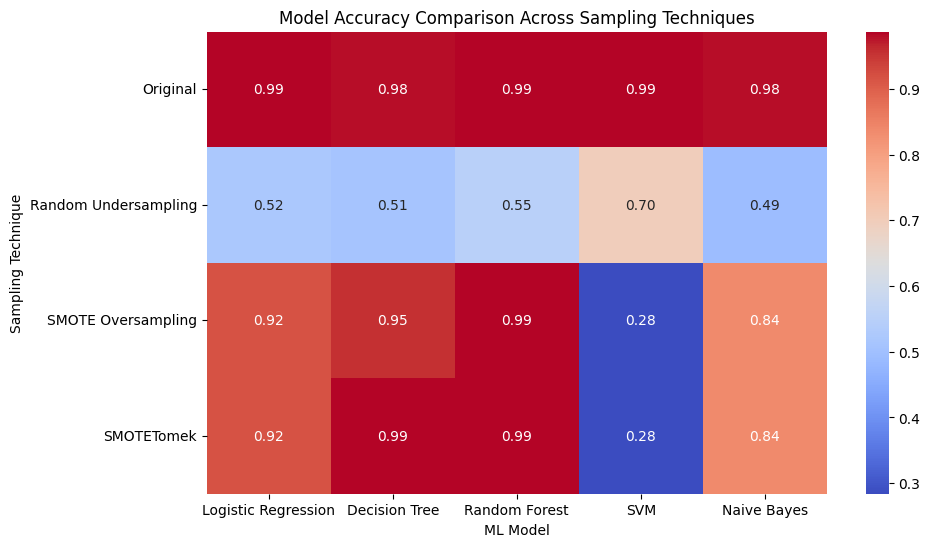


Analysis complete! Download `sampling_results.csv` and push it to GitHub.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek


from google.colab import files
uploaded = files.upload()


df = pd.read_csv("Creditcard_data.csv")


print(df.head())
print(df.info())

X = df.drop(columns=['Class'])
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


sampling_methods = {
    "Original": (X_train, y_train),
    "Random Undersampling": RandomUnderSampler(sampling_strategy='auto', random_state=42).fit_resample(X_train, y_train),
    "SMOTE Oversampling": SMOTE(sampling_strategy='auto', random_state=42).fit_resample(X_train, y_train),
    "SMOTETomek": SMOTETomek(sampling_strategy='auto', random_state=42).fit_resample(X_train, y_train)
}


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


results = {}
for sampling_name, (X_resampled, y_resampled) in sampling_methods.items():
    print(f"\nTraining models using {sampling_name} dataset:")
    results[sampling_name] = {}

    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[sampling_name][model_name] = acc
        print(f"{model_name}: {acc:.4f}")

results_df = pd.DataFrame(results).T
print("\nFinal Accuracy Results:\n", results_df)


plt.figure(figsize=(10,6))
sns.heatmap(results_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Model Accuracy Comparison Across Sampling Techniques")
plt.ylabel("Sampling Technique")
plt.xlabel("ML Model")
plt.show()

# Save results and upload to GitHub manually
results_df.to_csv("sampling_results.csv", index=True)
print("\nAnalysis complete! Download `sampling_results.csv` and push it to GitHub.")
